# Bay Wheels System Dataset
## by Bindushree

## Investigation Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Their eye-catching bikes are durable, easy to use, and built to fit everyone.The Classic bicycles were designed for easy riding in an urban environment. They were built to be comfortable for any type of rider, regardless of height, or riding ability. This first-of-its-kind hybrid ebike allows you to dock at any Bay Wheels stations or use the cable to lock to any bike rack within the service area. With miles of service area and nearly 400 stations, Bay Wheels gets you where you’re going.

## Dataset Overview

The dataset I have used here is the 2017 trip data for the exploratory analysis. It consists of about 519k rows and 13 columns.

Analysis and findings.

1. When are most trips taken in terms of time of day, day of the week, or month of the year?
2. How long does the average trip take?
3. Does the above depend on if a user is a subscriber or customer?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("df_clean_final.csv")
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_day,start_week,start_month,hour,end_day,end_week,end_month
161109,764,2017-11-07 07:51:46.293,2017-11-07 08:04:30.603,81,Berry St at 4th St,37.775880,-122.393170,8,The Embarcadero at Vallejo St,37.799953,-122.398525,1476,Subscriber,7,Tuesday,November,7,7,Tuesday,November
242858,15262,2017-10-14 16:28:20.663,2017-10-14 20:42:42.692,70,Central Ave at Fell St,37.773311,-122.444293,53,Grove St at Divisadero,37.775946,-122.437777,1412,Customer,14,Saturday,October,16,14,Saturday,October
255114,174,2017-10-11 08:34:21.596,2017-10-11 08:37:15.699,209,45th St at MLK Jr Way,37.833558,-122.267418,176,MacArthur BART Station,37.828410,-122.266315,1387,Subscriber,11,Wednesday,October,8,11,Wednesday,October
150053,385,2017-11-09 17:20:55.559,2017-11-09 17:27:21.373,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1076,Subscriber,9,Thursday,November,17,9,Thursday,November
427887,944,2017-08-18 18:22:25.763,2017-08-18 18:38:09.867,89,Division St at Potrero Ave,37.769218,-122.407646,109,17th St at Valencia St,37.763316,-122.421904,2625,Subscriber,18,Friday,August,18,18,Friday,August


In [28]:
# Change the datatypes of start and end time to datetime datatype
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Change the dataype of user_type column to category datatype
df['user_type'] = df['user_type'].astype('category')
df['start_week'] = df['start_week'].astype('category')
df['end_week'] = df['end_week'].astype('category')
df['start_month'] = df['start_month'].astype('category')
df['end_month'] = df['end_month'].astype('category')

order_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered = pd.api.types.CategoricalDtype(ordered= True, categories = order_week)
df['start_week'] = df['start_week'].astype(ordered)

order_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered = pd.api.types.CategoricalDtype(ordered= True, categories = order_week)
df['end_week'] = df['end_week'].astype(ordered)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## User's Proportion

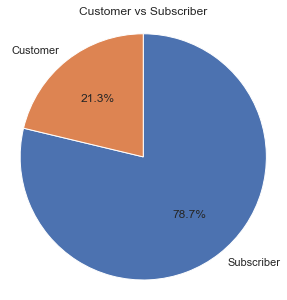

In [10]:
# Proportion of the type of users in the Bay Wheels
user = df['user_type'].value_counts()/df.count()[0]
user

# Visualize the user type column
sb.set(rc={'figure.figsize':(14,5)})
plt.pie(user,labels=user.index, startangle=90, counterclock=False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Customer vs Subscriber');

We see that more than a quarter of users are subscribers as compared to the customers. May be subscribers have more advantages or discounts or flexibilty for the rides and people prefer to be the subscribers for the Bay Wheels.

## Proportion of trips during the weekdays & weekends

max_week_order: 81410
max_prop: 0.15664806619203386


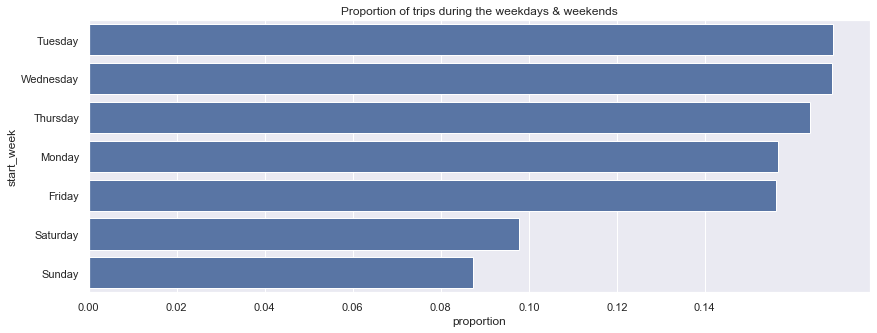

In [29]:
# Proportion of users during the days of the week
week_counts = df['start_week'].value_counts()
week_order = week_counts.index
n_df = df.shape[0]
max_week_order = week_counts[0]
print('max_week_order:', max_week_order)
max_prop = max_week_order/n_df
print('max_prop:', max_prop)

tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Visualize the number of rides on the days of the week
base_color = sb.color_palette()[0]
week_order = df['start_week'].value_counts().index
sb.countplot(data = df, y = 'start_week', color = base_color, order = week_order)
plt.xticks(tick_props * n_df, tick_names)
plt.xlabel('proportion')
plt.title('Proportion of trips during the weekdays & weekends');

We see that the trips on Tuesdays, Wednesdays are the highest with more than 16%, followed by Thursdays and the least number of trips is on Sunday with less than .9%. We can notice that most of the users are using the bikes for weekday transportation that is more affordable, quick and accessible compared to the trips on weekends where users might mainly use it for leisure time.

# Most number of trips in a day

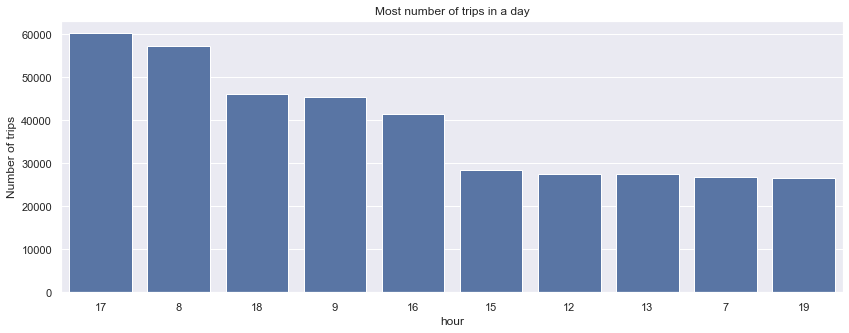

In [18]:
hour_counts = df['hour'].value_counts().head(10)
hour_order = hour_counts.index
sb.countplot(data = df, x = 'hour', color = base_color, order = hour_order)
plt.xlabel('hour')
plt.ylabel('Number of trips')
plt.title('Most number of trips in a day');

We see that most of the trips are in the early morning at 8 hr followed by 9 hr and in the evenings at 17 hr and followed by 18 hr.We can say that the users are using the bikes for everyday transportation purposes during these hours of the day.

# Duration of the trips by the users

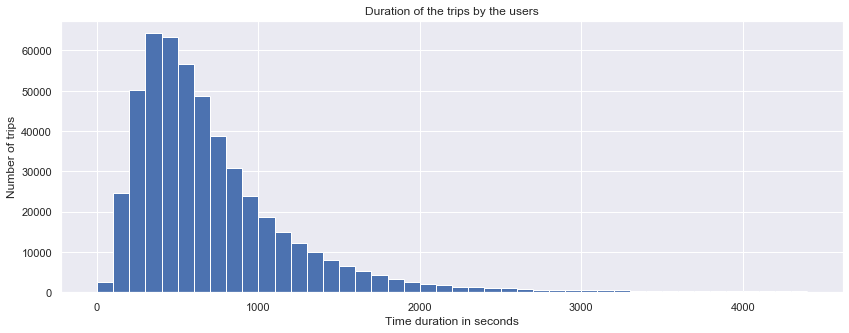

In [19]:
bins = np.arange(0, 4500, 100)
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xlabel('Time duration in seconds')
plt.ylabel('Number of trips')
plt.title('Duration of the trips by the users');

We see that the users maximum duration for the rides is around 6 minutes and the minimum duration is about 1 hour

# Most trips per user type during the week

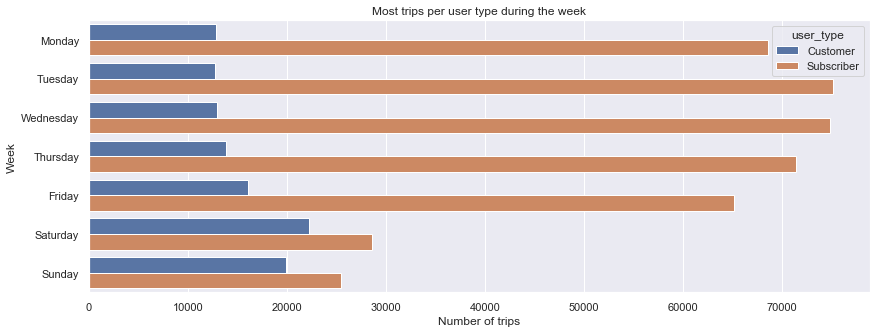

In [30]:
# On which days and which type of user had the most rides
sb.countplot(data = df, y='start_week', hue = 'user_type')
plt.xlabel('Number of trips')
plt.ylabel('Week')
plt.title('Most trips per user type during the week');

1. We see that the subscriber users have most number of rides on the weekdays which implies that they are frequent riders during the weekdays where they have the advantages like discounts or flexibility which is more affordable on a daily basis.
2. The Customer users have the most rides on the weekends, which implies that they might use the vehicle for their leisure time.

# Trip Count Distribution by Hour

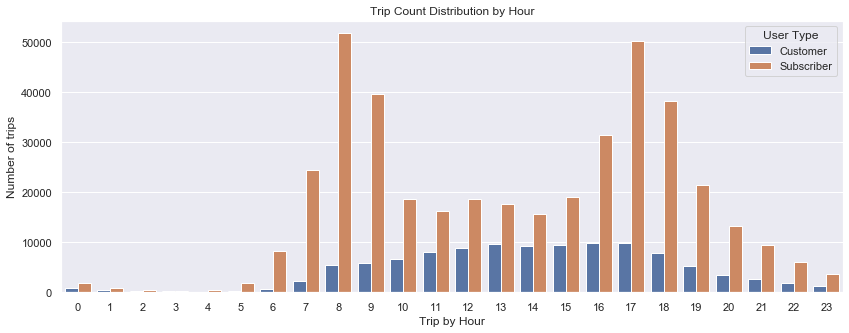

In [23]:
sb.countplot(data=df, x='hour', hue='user_type')
plt.xlabel('Trip by Hour')
plt.ylabel('Number of trips')
plt.title('Trip Count Distribution by Hour')
plt.legend(title='User Type');

Wee see that highest number of trips are by subscribers and are most frequent during the morning between 8hr and 9 hr and in the evening between 17hr and 18hr. The trips by Customers is mostly between the afternoon and evening.

# Daily Trip Duration by User Type

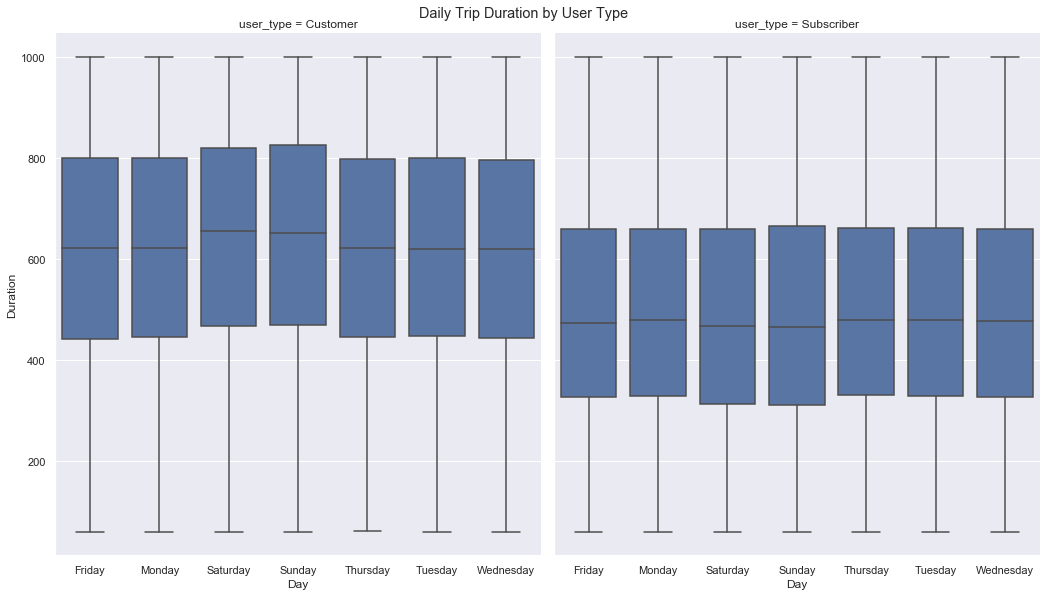

In [25]:
# Lets take a bunch of data for easy visualizations. I have considered the trip duration less than or equal to around 16 minutes 
duration_1000 = df.loc[df['duration_sec'] <= 1000]

g = sb.FacetGrid(data = duration_1000, col = 'user_type', height = 8.27, aspect = (14.70/2)/8.27)
g.map(sb.boxplot, 'start_week', 'duration_sec');
plt.suptitle("Daily Trip Duration by User Type", y = 1)
g.set_axis_labels('Day', 'Duration');

# Conclusion

1. From all the above visualizations we can conclude that being a subscriber for the Bay Wheels is more advantages compared to being a customer. There might be discounts, flexibility and also they are affordable if the subscription is made for frequent travel.
2. We see that the subscribers mostly use the bikes on weekdays for transporation purpose that is quiet quick to travel, whereas the customers use the bikes on weekends for their leisure or free time and also they have the bikes for a longer duration as compared to the subscribers.
3. The most frequent travel by subscribers is between 8 and 9 hr in the morning and between 17 and 18hr in the evening which implies that most of them use the bikes for work purpose or mobility on a daily basis which is easy to travel.
4. The most frequent travel time for customers is mostly between the afternoon and evenings.
5. So finally we can say that subscribers and the customers have two different behaviours.

In [37]:
! jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 469174 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Bindushree\anaconda3\envs\test_env\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Bindushree\anaconda3\envs\test_env\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Bindushree\anaconda3\envs\test_env\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Bindushree\anaconda3\envs\test_env\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\Bindushree\anaconda3\envs\test_env\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in